<a href="https://colab.research.google.com/github/Datz-AsadAnalyst/Customer_Churn_Analysis/blob/main/Data_Visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Visualization**

Importing **Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="whitegrid")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data_Viz.csv to cleaned_data_Viz.csv


In [3]:
df_viz = pd.read_csv("cleaned_data_Viz.csv")
df_viz.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Count of Customers

/tmp/ipython-input-6-1905199437.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_viz, x='Churn', palette=custom_palette, ax=ax)


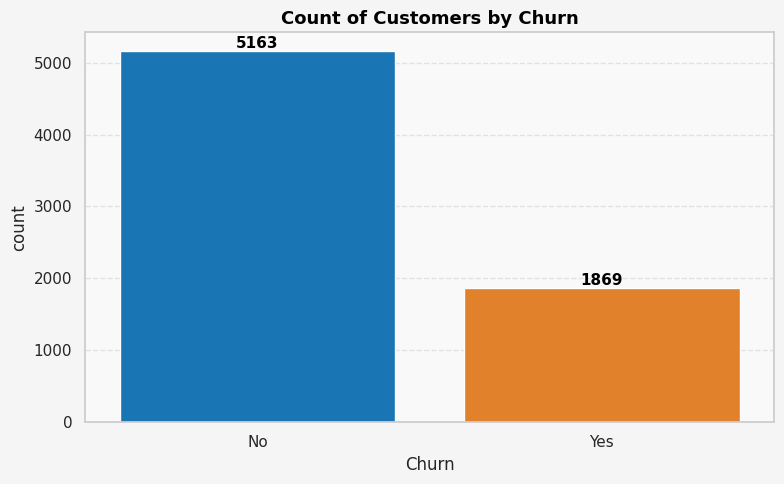

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
custom_palette = ['#007acc', '#ff7f0e']
sns.countplot(data=df_viz, x='Churn', palette=custom_palette, ax=ax)

ax.set_title("Count of Customers by Churn", fontsize=13, weight='bold', color='black')

# Bar Label Fix: Loop through all containers
for container in ax.containers:
    ax.bar_label(container, fontsize=11, weight='bold', color='black')

# Styling
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_facecolor('#f9f9f9')
fig.patch.set_facecolor('#f5f5f5')

plt.tight_layout()
plt.show()

## **Percentage**

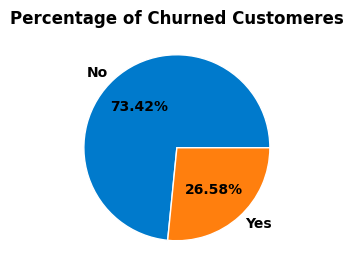

In [ ]:
plt.figure(figsize = (3,4))
custom_palette = ['#007acc', '#ff7f0e']
gb = df_viz.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%",colors=custom_palette, textprops={'color': 'black', 'weight': 'bold', 'fontsize': 10})
plt.title("Percentage of Churned Customeres", fontsize = 12,weight='bold',color='black')
plt.show()

In [ ]:
# categorical_cols = df_viz.select_dtypes(include='object').columns.drop('Churn')

# for col in categorical_cols:
#     plt.figure(figsize=(6,3))
#     sns.countplot(data=df_viz, x=col, hue='Churn')
#     plt.title(f"{col} vs Churn")
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()


# **Categorical Columns**

In [ ]:
import os

def plot_categorical_cols(
    df,
    categorical_cols,
    target_col,
    plot_type='countplot',
    figsize=(6, 3),
    rotation=45,
    palette=None,
    show_labels=False,
    label_type='count',
    save=False,
    save_dir='plots/'
):
    """
    Plots categorical columns vs target using specified plot type.

    Parameters:
        df (DataFrame): Dataframe.
        categorical_cols (list): List of categorical columns.
        target_col (str): Target/hue column.
        plot_type (str): 'countplot', 'barplot', 'violinplot', 'boxplot'.
        figsize (tuple): Figure size.
        rotation (int): X-axis label rotation.
        palette (list or str): Seaborn color palette.
        save (bool): If True, saves plots as PNG.
        save_dir (str): Directory to save plots.
    """
    if save and not os.path.exists(save_dir):
        os.makedirs(save_dir)

    for col in categorical_cols:
        plt.figure(figsize=figsize)

        if plot_type == 'countplot':
            ax=sns.countplot(data=df, x=col, hue=target_col, palette=palette)

        elif plot_type == 'barplot':
            # barplot needs numeric y — here using value_counts
            temp = df.groupby([col, target_col]).size().reset_index(name='count')
            ax=sns.barplot(data=temp, x=col, y='count', hue=target_col, palette=palette)

        elif plot_type == 'violinplot':
            sns.violinplot(data=df, x=col, y=target_col, palette=palette)

        elif plot_type == 'boxplot':
            sns.boxplot(data=df, x=col, y=target_col, palette=palette)

        else:
            print(f"Plot type '{plot_type}' not supported.")
            continue

        if show_labels:
            # For each bar
            for p in ax.containers:
                labels = []
                for bar in p:
                    height = bar.get_height()
                    if height == 0:
                        labels.append("")
                        continue
                    if label_type == 'count':
                        labels.append(f'{int(height)}')
                    elif label_type == 'percent':
                        total = len(df)
                        percent = 100 * height / total
                        labels.append(f'{percent:.1f}%')
                    else:
                        labels.append(f'{int(height)}')

                ax.bar_label(p, labels=labels, label_type='edge', padding=2,
                             fontsize=8, color='black', weight='bold')
        plt.title(f"{col} vs {target_col}",weight='bold',fontsize=13,color='black')
        plt.xlabel(col,weight='bold')
        plt.ylabel(target_col,weight='bold')
        plt.xticks(rotation=rotation)
        plt.tight_layout()

        if save:
            filename = f"{save_dir}{col}_{plot_type}.png"
            plt.savefig(filename)
            print(f"Saved: {filename}")

        plt.show()

Saved: ./plots/gender_countplot.png


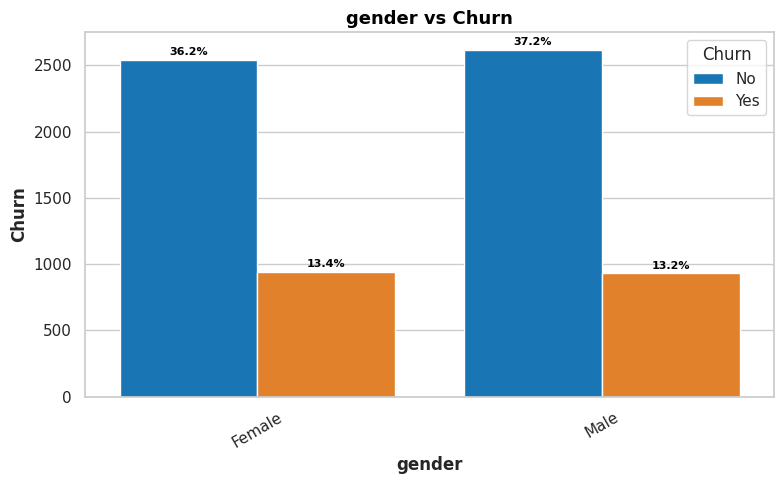

In [ ]:
plot_categorical_cols(
    df=df_viz,
    categorical_cols=['gender'],
    target_col='Churn',
    plot_type='countplot',
    figsize=(8, 5),
    rotation=30,
    palette=['#007acc', '#ff7f0e'],
     show_labels=True,
    label_type='percent',
    save=True,

    save_dir='./plots/'
)


Saved: ./plots/Contract_countplot.png


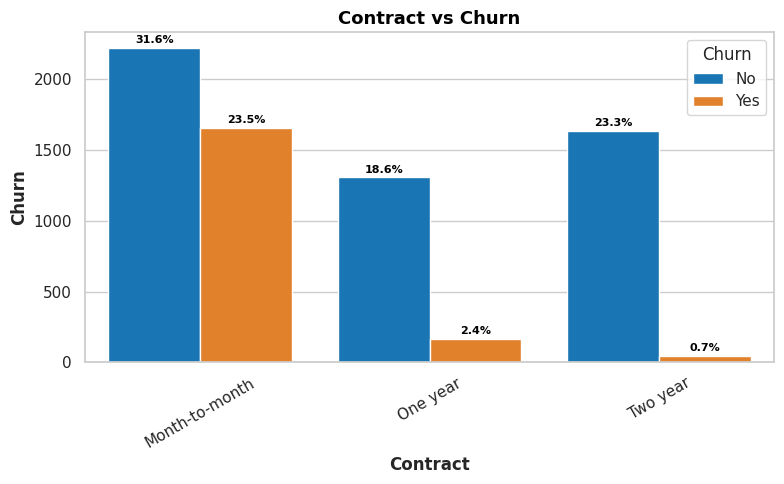

In [ ]:
plot_categorical_cols(
    df=df_viz,
    categorical_cols=['Contract'],
    target_col='Churn',
    plot_type='countplot',
    figsize=(8, 5),
    rotation=30,
    palette=['#007acc', '#ff7f0e'],
    show_labels=True,
    label_type='percent',
    save=True,
    save_dir='./plots/'
)


Saved: ./plots/InternetService_barplot.png


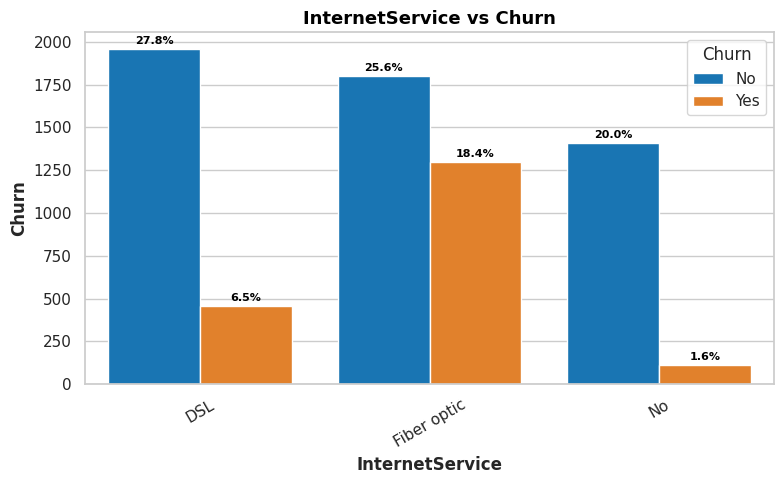

In [ ]:
plot_categorical_cols(
    df=df_viz,
    categorical_cols=['InternetService'],
    target_col='Churn',
    plot_type='barplot',
    figsize=(8, 5),
    rotation=30,
    palette=['#007acc', '#ff7f0e'],
    show_labels=True,
    label_type='percent',
    save=True,
    save_dir='./plots/'
)

# **Numerical Columns**

In [ ]:
def plot_numeric_cols(
    df,
    numeric_cols,
    target_col,
    plot_type='boxplot',
    figsize=(6, 3),
    palette=None,
    show_labels=False,
    label_type='count',
    save=False,
    save_dir='plots/'
):
    """
    Plots numeric columns vs target using specified plot type.
    """

    if save and not os.path.exists(save_dir):
        os.makedirs(save_dir)

    for col in numeric_cols:
        plt.figure(figsize=figsize)

        if plot_type == 'boxplot':
            ax=sns.boxplot(data=df, x=target_col, y=col, palette=palette)

        elif plot_type == 'violinplot':
            ax=sns.violinplot(data=df, x=target_col, y=col, palette=palette)

        else:
            print(f"Plot type '{plot_type}' not supported for numeric columns.")
            continue

            if show_labels:
            # For each bar
             for p in ax.containers:
                labels = []
                for bar in p:
                    height = bar.get_height()
                    if height == 0:
                        labels.append("")
                        continue
                    if label_type == 'count':
                        labels.append(f'{int(height)}')
                    elif label_type == 'percent':
                        total = len(df)
                        percent = 100 * height / total
                        labels.append(f'{percent:.1f}%')
                    else:
                        labels.append(f'{int(height)}')

                ax.bar_label(p, labels=labels, label_type='edge', padding=2,
                             fontsize=8, color='black', weight='bold')

        plt.title(f"{col} distribution by {target_col}",weight='bold',fontsize=13,color='black')
        plt.xlabel(target_col,weight='bold')
        plt.ylabel(col,weight='bold')
        plt.tight_layout()

        if save:
            filename = f"{save_dir}{col}_{plot_type}.png"
            plt.savefig(filename)
            print(f"Saved: {filename}")

        plt.show()

/tmp/ipython-input-48-2499017002.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.boxplot(data=df, x=target_col, y=col, palette=palette)


Saved: plots/tenure_boxplot.png


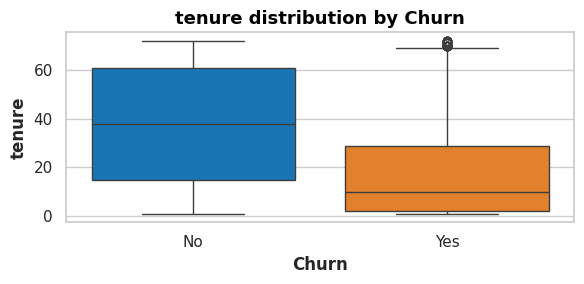

In [ ]:
plot_numeric_cols(
    df=df_viz,
    numeric_cols=['tenure'],
    target_col='Churn',
    plot_type='boxplot',
    show_labels=True,
    label_type='percent',
    palette=['#007acc', '#ff7f0e'],
    save=True
)

# Correlation

/tmp/ipython-input-13-2469930427.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_correlation.index, y=churn_correlation.values, palette='coolwarm')


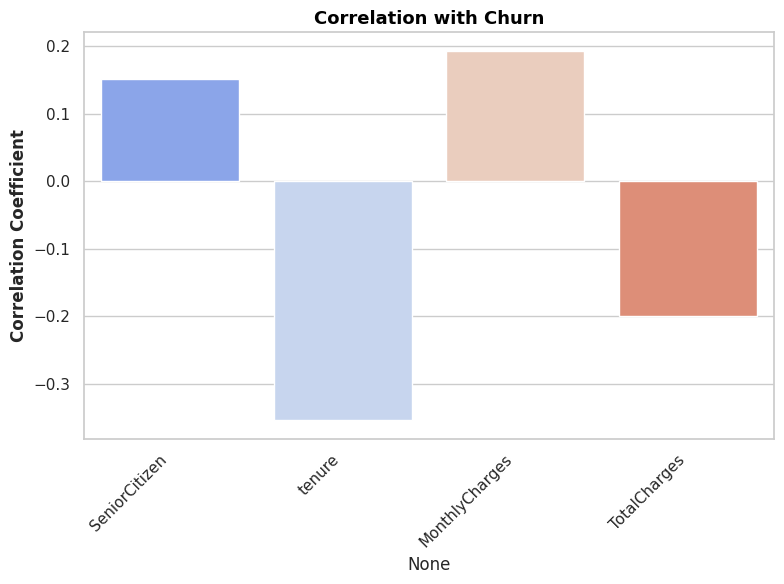

In [13]:
# Convert 'Churn' column to numeric (0 for No, 1 for Yes)
df_viz['Churn'] = df_viz['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select only numeric columns for correlation calculation
numeric_cols = df_viz.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
correlation_matrix = df_viz[numeric_cols].corr()

# Get the correlation of all numeric columns with 'Churn'
churn_correlation = correlation_matrix['Churn'].drop('Churn') # Drop 'Churn' itself

# Plot the correlation with 'Churn'
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_correlation.index, y=churn_correlation.values, palette='coolwarm')
plt.title('Correlation with Churn', weight='bold', fontsize=13, color='black')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Correlation Coefficient', weight='bold')
plt.tight_layout()
plt.show()

<Axes: >

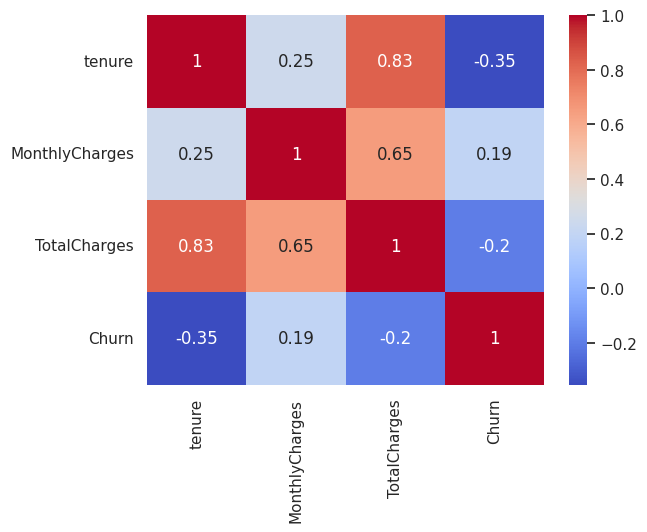

In [16]:

numeric_cols = df_viz.select_dtypes(include=['float64', 'int64']).columns.drop('SeniorCitizen')

sns.heatmap(df_viz[numeric_cols].corr(), annot=True, cmap='coolwarm')


 ## 1. Tenure vs Churn → -0.35
Customers with longer tenure are less likely to churn.
This suggests that retaining customers over time improves loyalty — long-term users churn kam karte hain.

Business Action: Offer loyalty programs or incentives for customers in their early months to increase tenure.
## 2. MonthlyCharges vs Churn → +0.19
Customers with higher monthly charges show a slightly higher chance of churning.
Though not a strong correlation, pricing may be a mild pain point.

Business Action: Consider discount plans or bundled offers for high-paying
customers to reduce churn.
##  3. TotalCharges vs Churn → -0.20
Customers who have paid more total charges (i.e., who have been with the company longer) tend to churn less.
TotalCharges combines duration + amount paid → indicates valuable long-term users. Business Action: Identify such users and offer retention bonuses or VIP treatment.



---



### 📌 Conclusion:

The analysis of the Telco Customer Churn dataset has revealed several key insights:

- Customers with **shorter tenure** are significantly more likely to churn. Long-term customers show greater loyalty.
- **Higher monthly charges** are weakly associated with increased churn. This may indicate dissatisfaction with pricing.
- Users with **electronic billing and month-to-month contracts** tend to churn more frequently than those with long-term contracts.
- Features like **TotalCharges** (representing lifetime value) are negatively correlated with churn, further confirming that older, high-value customers are more stable.

These patterns suggest that **customer age, contract type, and cost sensitivity** are important drivers of churn.




---
### 💡 Business Recommendations:

Based on the findings, the following strategies could help reduce customer churn:

1. 🎯 **Introduce loyalty rewards** for new users who complete 3, 6, or 12 months — to increase tenure and retention.
2. 💸 **Offer customized discounts** to high-churn risk segments, especially users with higher monthly charges.
3. 📞 **Proactively reach out to customers** on month-to-month contracts and promote longer-term plans with incentives.
4. 📊 **Monitor new customers in first 3 months** — churn is highest here, so early engagement is critical.
5. 🔁 **Use these insights for churn prediction modeling** in future (logistic regression, decision trees, etc.).

Overall, the company can significantly improve retention by focusing on tenure, pricing sensitivity, and contract strategy.






---


       <<<<<<<<<<<>>>>>>>>>>>>>


---

 Now we will be moving forward to create an Machine Learning model to Predict whether a customer will churn (Yes/No) based on the available features

